# Regresión Múltiple. Aereolinea


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importar el excel
df = pd.read_excel('/content/Reto_Regresion.xlsx', sheet_name='datos para regresión')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   AA                            108 non-null    int64
 1   Delta                         108 non-null    int64
 2   United                        108 non-null    int64
 3   Days from Purchase to Travel  108 non-null    int64
 4   Business                      108 non-null    int64
 5   First Class                   108 non-null    int64
 6   Origin                        108 non-null    int64
 7   Ticket Price                  108 non-null    int64
 8   Lunes                         108 non-null    int64
 9   Martes                        108 non-null    int64
 10  Miércoles                     108 non-null    int64
 11  Jueves                        108 non-null    int64
 12  Viernes                       108 non-null    int64
 13  Sábado                        108 n

In [3]:
#crear una matriz de correlación para todas las variables
corr = df.corr()
#Crear una máscara para seleccionar solo la diagonal y valores inferiores
mask = np.triu(np.ones_like(corr, dtype=bool))
lower_triangle = corr.mask(mask)
lower_triangle

,AA,Delta,United,Days from Purchase to Travel,Business,First Class,Origin,Ticket Price,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Trips,Infrequent,Frequent,Extreme
AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delta,-0.306484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United,-0.382971,-0.266760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days from Purchase to Travel,-0.048224,0.029532,0.013967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business,0.017209,0.265323,0.088721,0.079281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First Class,-0.180907,-0.267498,-0.192450,-0.138928,-0.548821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin,-0.181818,-0.086153,-0.043519,-0.018079,0.036405,0.263822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket Price,0.362682,-0.070089,0.200270,-0.258415,-0.147254,0.078112,-0.079771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lunes,-0.023999,0.005211,0.017675,-0.046192,0.032931,0.030614,0.094612,-0.051963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Martes,0.176034,-0.055777,-0.120386,-0.117784,-0.043486,0.104257,0.025541,0.171748,-0.140435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Busqueda del modelo cogruente
import statsmodels.api as sm
from scipy import stats # Corrected import


def graficar(x, y, stan_res, model_loc):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    ########## Normal Probability Plot
    (quantiles, values), (slope, intercept, r) = stats.probplot(stan_res, dist='norm') # Corrected function call
    axes[0, 0].plot(values, quantiles, 'ob')
    axes[0, 0].plot(quantiles * slope + intercept, quantiles, 'r')
    axes[0, 0].set_title('Normal Probability Plot')
    axes[0, 0].set_ylabel('Percent')
    axes[0, 0].set_xlabel('Standardized Residual')
    ticks_perc=[1,10,50,90,99]
    ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
    axes[0, 0].grid()

    ########### Versus Fits
    model_fitted_y = model_loc.fittedvalues
    sns.residplot(x=model_fitted_y, y=stan_res, ax=axes[0,1])
    axes[0, 1].set_title('Versus Fits')
    axes[0, 1].set_xlabel('Fitted Value')
    axes[0, 1].set_ylabel('Standardized Residual')


    ########### Histogram
    stan_res = model_loc.get_influence().resid_studentized_internal
    sns.histplot(stan_res, bins=10, ax=axes[1,0])
    axes[1, 0].set_title('Histogram') # Corrected axes index
    axes[1, 0].set_ylabel('Frecuency') # Corrected axes index
    axes[1, 0].set_xlabel('Standardized Residual') # Corrected axes index

    ########### Versus Order
    axes[1, 1].scatter(x.index, stan_res)
    axes[1, 1].plot(x.index,stan_res) # Corrected variable name
    axes[1, 1].axhline(y=0,color='grey',linestyle=':')
    axes[1, 1].set_title('Versus Order')
    axes[1, 1].set_xlabel('Observation Order')
    axes[1, 1].set_ylabel('Standardized Residual')

In [5]:
#Crear el modelo sm.OLS con todas las variables que estan en df
x = df[['AA','Delta','United','Days from Purchase to Travel','Business','First Class','Origin','Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Trips','Infrequent','Frequent','Extreme']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     9.387
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.56e-13
Time:                        21:01:49   Log-Likelihood:                -579.31
No. Observations:                 108   AIC:                             1195.
Df Residuals:                      90   BIC:                             1243.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [6]:
#Analizar el VIF que se tiene para cada variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Crear un DataFrame con los valores del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Display the VIF data
vif_data

,feature,VIF
0,const,55.529334
1,AA,2.545083
2,Delta,2.187637
3,United,2.302210
4,Days from Purchase to Travel,1.112637
5,Business,1.600695
6,First Class,2.359423
7,Origin,1.254946
8,Lunes,1.662190
9,Martes,1.929985


In [7]:
#imprimir la ecuación de regresion
print('Ticket Price =',round(model.params[0],2), end=' ')
for i in range(1,model.params.size):
  if model.params[i] > 0:
    print(' + ',end=' ')
  print(round(model.params[i],2),model.params.index[i],end=' ')

Ticket Price = 239.72  +  167.77 AA  +  143.81 Delta  +  176.75 United -0.4 Days from Purchase to Travel -33.69 Business  +  84.35 First Class  +  14.2 Origin -26.65 Lunes  +  0.09 Martes -22.25 Miércoles  +  9.56 Jueves -20.84 Viernes -19.06 Sábado  +  2.85 Trips  +  0.6 Infrequent -79.92 Frequent -54.37 Extreme 

/tmp/ipython-input-2098390745.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Ticket Price =',round(model.params[0],2), end=' ')
/tmp/ipython-input-2098390745.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.params[i] > 0:
/tmp/ipython-input-2098390745.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(round(model.params[i],2),model.params.index[i],end=' ')


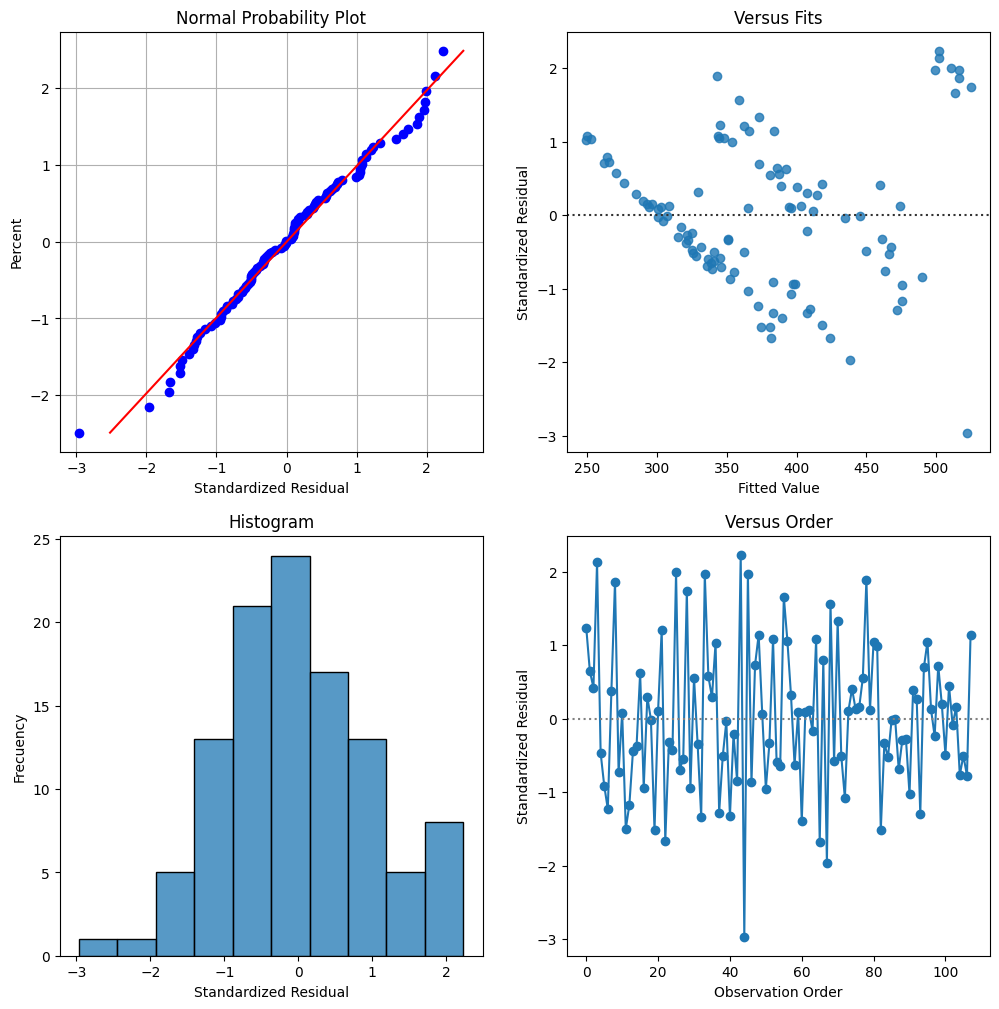

In [8]:
#Graficar el modelo 1
Standardized_residuals = model.get_influence().resid_studentized_internal
graficar(x, y, Standardized_residuals, model)

In [11]:
#Corregir el modelo sm.OLS con las variables significativas.
x = df[['AA','Delta','United','Days from Purchase to Travel','Business','First Class','Origin','Lunes','Miércoles','Jueves','Viernes','Sábado','Trips','Frequent','Extreme']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     10.87
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.42e-14
Time:                        21:10:48   Log-Likelihood:                -579.31
No. Observations:                 108   AIC:                             1191.
Df Residuals:                      92   BIC:                             1234.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [12]:
#Corregir el modelo sm.OLS con las variables significativas.
x = df[['AA','Delta','United','Days from Purchase to Travel','Business','First Class','Origin','Lunes','Miércoles','Viernes','Sábado','Trips','Frequent','Extreme']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     11.73
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           4.52e-15
Time:                        21:10:52   Log-Likelihood:                -579.46
No. Observations:                 108   AIC:                             1189.
Df Residuals:                      93   BIC:                             1229.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [13]:
#Corregir el modelo sm.OLS con las variables significativas.
x = df[['AA','Delta','United','Days from Purchase to Travel','Business','First Class','Origin','Lunes','Miércoles','Viernes','Sábado','Frequent','Extreme']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     12.53
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           2.05e-15
Time:                        21:10:55   Log-Likelihood:                -580.09
No. Observations:                 108   AIC:                             1188.
Df Residuals:                      94   BIC:                             1226.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [14]:
#Corregir el modelo sm.OLS con las variables significativas.
x = df[['AA','Delta','United','Days from Purchase to Travel','Business','First Class','Origin','Lunes','Miércoles','Viernes','Sábado','Frequent']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     13.54
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           7.91e-16
Time:                        21:11:00   Log-Likelihood:                -580.56
No. Observations:                 108   AIC:                             1187.
Df Residuals:                      95   BIC:                             1222.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [15]:
#Corregir el modelo sm.OLS con las variables significativas.
x = df[['AA','Delta','United','Days from Purchase to Travel','Business','First Class','Origin','Lunes','Viernes','Sábado','Frequent']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     14.55
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           4.07e-16
Time:                        21:11:02   Log-Likelihood:                -581.41
No. Observations:                 108   AIC:                             1187.
Df Residuals:                      96   BIC:                             1219.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [16]:
#Corregir el modelo sm.OLS con las variables significativas.
x = df[['AA','Delta','United','Days from Purchase to Travel','Business','First Class','Origin','Lunes','Viernes','Frequent']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     15.82
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.85e-16
Time:                        21:11:06   Log-Likelihood:                -582.15
No. Observations:                 108   AIC:                             1186.
Df Residuals:                      97   BIC:                             1216.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [17]:
#Corregir el modelo sm.OLS con las variables significativas.
x = df[['AA','Delta','United','Days from Purchase to Travel','Business','First Class','Origin','Viernes','Frequent']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.35
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           8.21e-17
Time:                        21:11:10   Log-Likelihood:                -582.92
No. Observations:                 108   AIC:                             1186.
Df Residuals:                      98   BIC:                             1213.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [18]:
#Corregir el modelo sm.OLS con las variables significativas.
x = df[['AA','Delta','United','Days from Purchase to Travel','Business','First Class','Origin','Frequent']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     19.28
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           3.44e-17
Time:                        21:11:12   Log-Likelihood:                -583.67
No. Observations:                 108   AIC:                             1185.
Df Residuals:                      99   BIC:                             1209.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [19]:
#Corregir el modelo sm.OLS con las variables significativas.
x = df[['AA','Delta','United','Days from Purchase to Travel','Business','First Class','Frequent']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     21.75
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.37e-17
Time:                        21:11:15   Log-Likelihood:                -584.42
No. Observations:                 108   AIC:                             1185.
Df Residuals:                     100   BIC:                             1206.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [20]:
#Corregir el modelo sm.OLS con las variables significativas.
x = df[['AA','Delta','United','Days from Purchase to Travel','First Class','Frequent']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     24.27
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.27e-17
Time:                        21:11:19   Log-Likelihood:                -586.18
No. Observations:                 108   AIC:                             1186.
Df Residuals:                     101   BIC:                             1205.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [21]:
#imprimir la ecuación de regresion
print('Ticket Price =',round(model.params[0],2), end=' ')
for i in range(1,model.params.size):
  if model.params[i] > 0:
    print(' + ',end=' ')
  print(round(model.params[i],2),model.params.index[i],end=' ')

Ticket Price = 233.69  +  175.84 AA  +  138.6 Delta  +  172.08 United -0.47 Days from Purchase to Travel  +  97.96 First Class -48.23 Frequent 

/tmp/ipython-input-2098390745.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Ticket Price =',round(model.params[0],2), end=' ')
/tmp/ipython-input-2098390745.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.params[i] > 0:
/tmp/ipython-input-2098390745.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(round(model.params[i],2),model.params.index[i],end=' ')


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(pd.DataFrame({'Variable': x.columns, 'VIF': vif}))

                       Variable        VIF
0                         const  14.976492
1                            AA   2.075444
2                         Delta   1.968143
3                        United   2.033357
4  Days from Purchase to Travel   1.047207
5                   First Class   1.674689
6                      Frequent   1.066377


In [23]:
#Corregir el modelo sm.OLS con las variables significativas.
x = df[['AA','United','Days from Purchase to Travel','First Class','Frequent']]
y = df['Ticket Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     13.57
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           3.81e-10
Time:                        21:11:45   Log-Likelihood:                -606.86
No. Observations:                 108   AIC:                             1226.
Df Residuals:                     102   BIC:                             1242.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(pd.DataFrame({'Variable': x.columns, 'VIF': vif}))

                       Variable       VIF
0                         const  8.330563
1                            AA  1.301499
2                        United  1.296469
3  Days from Purchase to Travel  1.038183
4                   First Class  1.161270
5                      Frequent  1.061859


In [25]:
#imprimir la ecuación de regresion
print('Ticket Price =',round(model.params[0],2), end=' ')
for i in range(1,model.params.size):
  if model.params[i] > 0:
    print(' + ',end=' ')
  print(round(model.params[i],2),model.params.index[i],end=' ')

Ticket Price = 330.67  +  104.0 AA  +  97.51 United -0.6 Days from Purchase to Travel  +  44.05 First Class -40.7 Frequent 

/tmp/ipython-input-2098390745.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Ticket Price =',round(model.params[0],2), end=' ')
/tmp/ipython-input-2098390745.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.params[i] > 0:
/tmp/ipython-input-2098390745.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(round(model.params[i],2),model.params.index[i],end=' ')


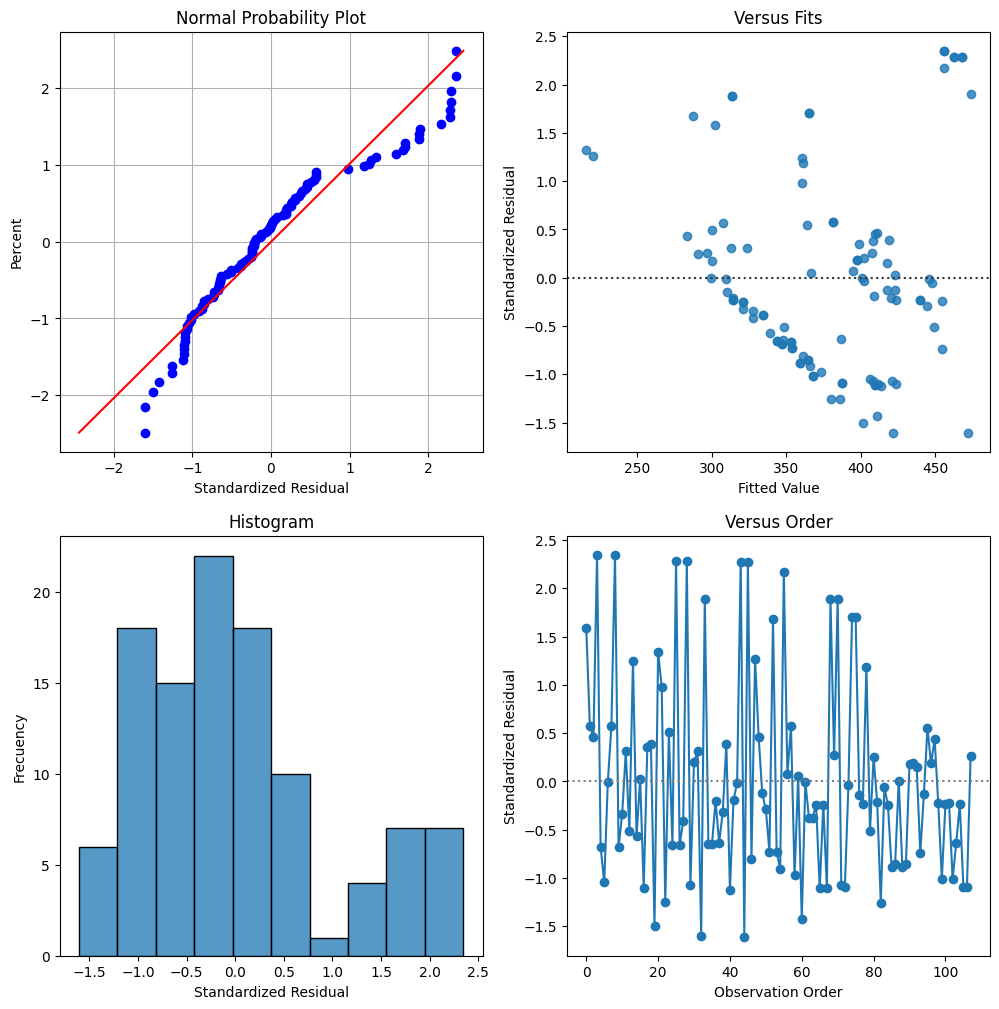

In [26]:
#Graficar el modelo 2
Standardized_residuals = model.get_influence().resid_studentized_internal
graficar(x, y, Standardized_residuals, model)